In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [13]:
df = pd.read_csv('Train_Data (1).csv')

In [14]:
print("Shape of data:", df.shape)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())



Shape of data: (1966, 9)
      SEQN  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN age_group
0  73564.0       2.0     2.0    35.7   110.0     2.0   150.0  14.91     Adult
1  73568.0       2.0     2.0    20.3    89.0     2.0    80.0   3.85     Adult
2  73576.0       1.0     2.0    23.2    89.0     2.0    68.0   6.14     Adult
3  73577.0       1.0     2.0    28.9   104.0     NaN    84.0  16.15     Adult
4  73580.0       2.0     1.0    35.9   103.0     2.0    81.0  10.92     Adult
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 

In [15]:
print(df['age_group'].unique())
print(df['age_group'].value_counts())


['Adult' 'Senior' nan]
age_group
Adult     1638
Senior     314
Name: count, dtype: int64


In [16]:
df.dropna(inplace=True)
df.drop(columns=['SEQN'], inplace=True)

df['is_senior'] = df['age_group'].apply(lambda x: 1 if x == 'Senior' else 0)
df.drop(columns=['age_group'], inplace=True)

print(df.shape)
print(df['is_senior'].value_counts())
print(df.head())


(1841, 8)
is_senior
0    1541
1     300
Name: count, dtype: int64
   RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN  is_senior
0       2.0     2.0    35.7   110.0     2.0   150.0  14.91          0
1       2.0     2.0    20.3    89.0     2.0    80.0   3.85          0
2       1.0     2.0    23.2    89.0     2.0    68.0   6.14          0
4       2.0     1.0    35.9   103.0     2.0    81.0  10.92          0
5       1.0     2.0    23.6   110.0     2.0   100.0   6.08          0


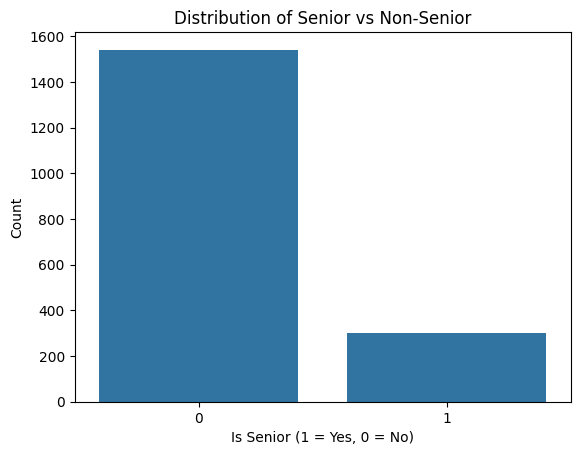

In [17]:
sns.countplot(x='is_senior', data=df)
plt.title('Distribution of Senior vs Non-Senior')
plt.xlabel('Is Senior (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

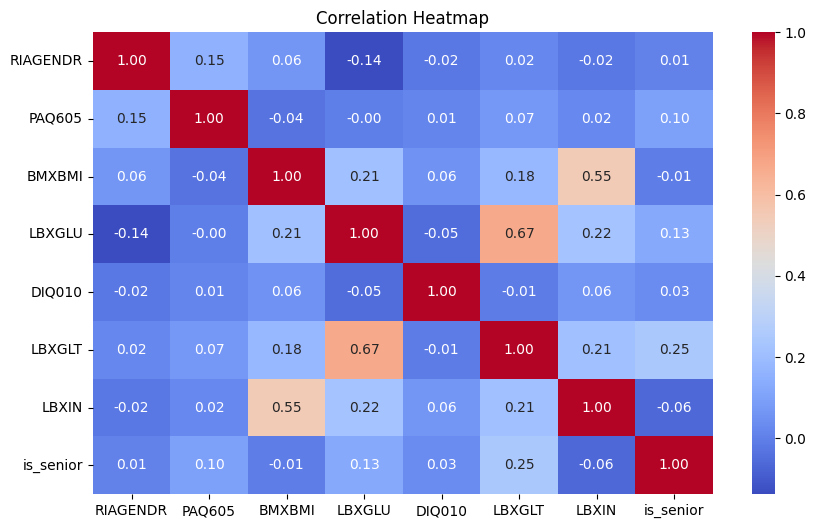

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [19]:
print(df.columns)


Index(['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN',
       'is_senior'],
      dtype='object')


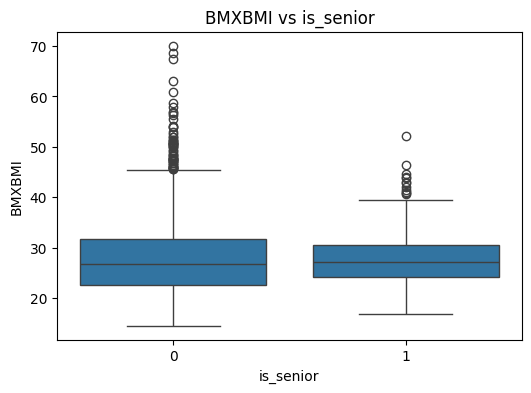

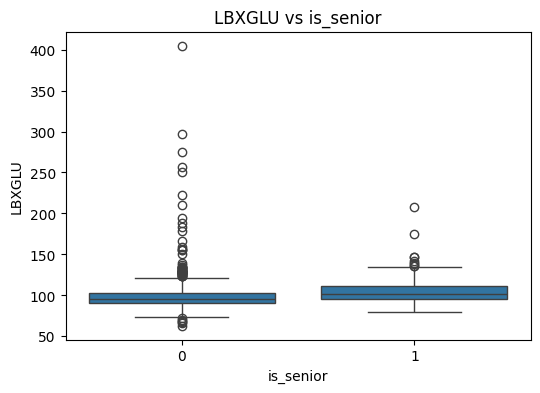

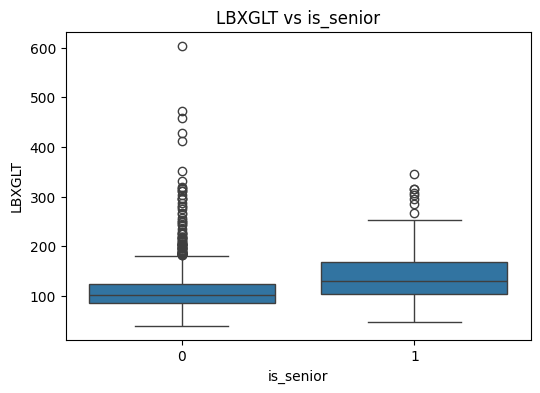

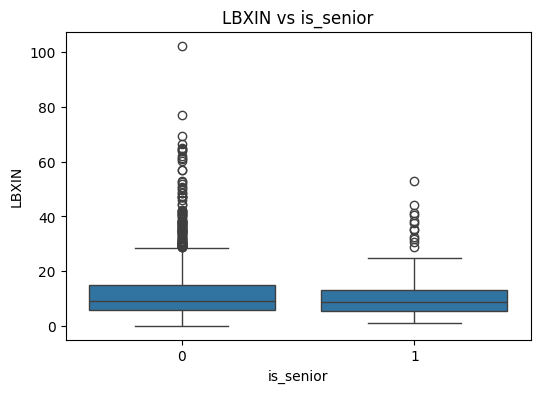

In [20]:
features = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

for col in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='is_senior', y=col, data=df)
    plt.title(f'{col} vs is_senior')
    plt.show()

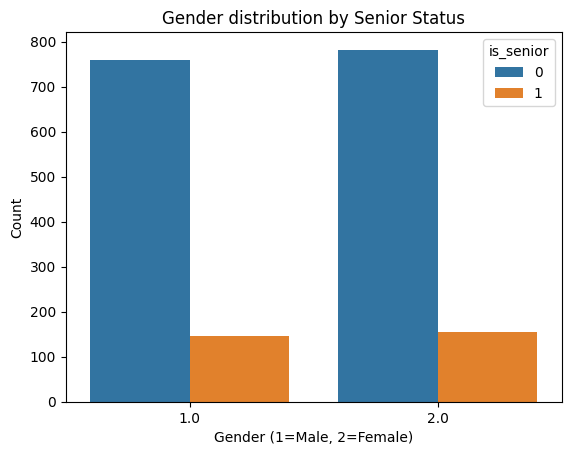

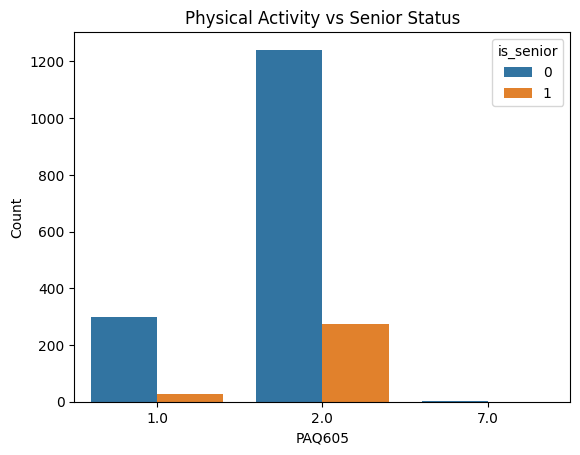

In [21]:
sns.countplot(x='RIAGENDR', hue='is_senior', data=df)
plt.title('Gender distribution by Senior Status')
plt.xlabel('Gender (1=Male, 2=Female)')
plt.ylabel('Count')
plt.show()

sns.countplot(x='PAQ605', hue='is_senior', data=df)
plt.title('Physical Activity vs Senior Status')
plt.xlabel('PAQ605')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['is_senior'])
y = df['is_senior']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

log_model = LogisticRegression(class_weight='balanced', random_state=42)
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)

print("🔹 Logistic Regression F1 Score:", f1_score(y_test, log_preds))
print(classification_report(y_test, log_preds))


🔹 Logistic Regression F1 Score: 0.49696969696969695
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       309
           1       0.39      0.68      0.50        60

    accuracy                           0.78       369
   macro avg       0.66      0.74      0.68       369
weighted avg       0.84      0.78      0.80       369



In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("🔹 Random Forest F1 Score:", f1_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


🔹 Random Forest F1 Score: 0.2564102564102564
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       309
           1       0.56      0.17      0.26        60

    accuracy                           0.84       369
   macro avg       0.71      0.57      0.58       369
weighted avg       0.81      0.84      0.81       369



In [27]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X)

print("🔹 Logistic Regression (Balanced) F1 Score:", f1_score(y, lr_preds))
print(classification_report(y, lr_preds))



🔹 Logistic Regression (Balanced) F1 Score: 0.436241610738255
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1541
           1       0.33      0.65      0.44       300

    accuracy                           0.73      1841
   macro avg       0.62      0.70      0.63      1841
weighted avg       0.82      0.73      0.76      1841



In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X)

print("🔹 Random Forest (Balanced) F1 Score:", f1_score(y, rf_preds))
print(classification_report(y, rf_preds))


🔹 Random Forest (Balanced) F1 Score: 0.8920863309352518
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1541
           1       0.97      0.83      0.89       300

    accuracy                           0.97      1841
   macro avg       0.97      0.91      0.94      1841
weighted avg       0.97      0.97      0.97      1841



In [29]:
test_df = pd.read_csv("Test_Data.csv")
X_test = test_df[['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']]
test_preds = rf_model.predict(X_test)
submission_df = pd.DataFrame({'age_group': test_preds})
submission_df.to_csv('submission_final.csv', index=False)

